Epoch 10/500 - loss: 0.6253 - acc: 0.8611 - val_loss: 0.6618 - val_acc: 0.6818
Epoch 20/500 - loss: 0.6371 - acc: 0.7738 - val_loss: 0.6458 - val_acc: 0.9091
Epoch 30/500 - loss: 1.4685 - acc: 0.3442 - val_loss: 1.1662 - val_acc: 0.4545
Epoch 40/500 - loss: 1.9188 - acc: 0.3294 - val_loss: 1.4236 - val_acc: 0.4545
Epoch 50/500 - loss: 1.6997 - acc: 0.2946 - val_loss: 1.2510 - val_acc: 0.4545
Epoch 60/500 - loss: 1.5463 - acc: 0.3155 - val_loss: 1.2038 - val_acc: 0.4545
Epoch 70/500 - loss: 1.5060 - acc: 0.3155 - val_loss: 1.1847 - val_acc: 0.4545
Epoch 80/500 - loss: 1.3691 - acc: 0.3155 - val_loss: 1.1233 - val_acc: 0.4545
Epoch 90/500 - loss: 1.3792 - acc: 0.2996 - val_loss: 1.1463 - val_acc: 0.3182
Epoch 100/500 - loss: 1.3884 - acc: 0.3085 - val_loss: 1.1390 - val_acc: 0.4545
Epoch 110/500 - loss: 1.3137 - acc: 0.3294 - val_loss: 1.1101 - val_acc: 0.4545
Epoch 120/500 - loss: 1.3331 - acc: 0.3085 - val_loss: 1.1032 - val_acc: 0.4545
Epoch 130/500 - loss: 1.3146 - acc: 0.3294 - val_

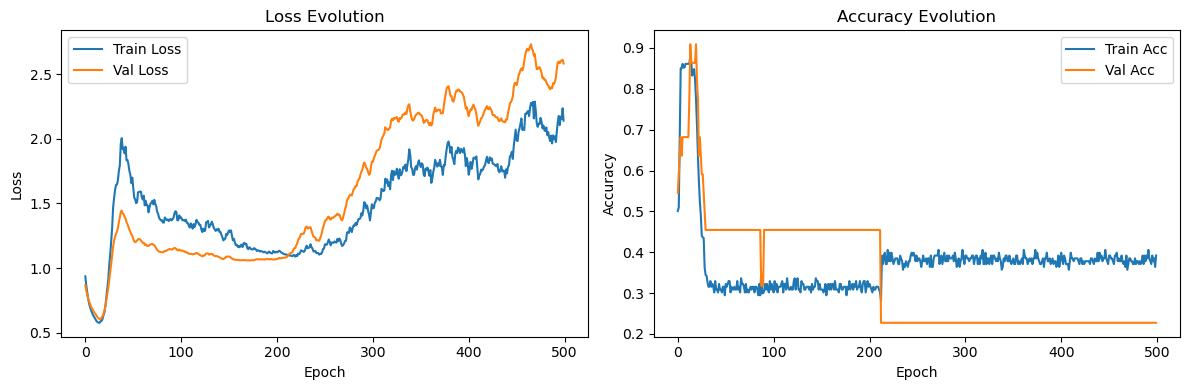

In [ ]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
from src.neural_network import NeuralNetwork
from src.optimizers import Adam
from src.trainer import Trainer
from src.utils import train_val_test_split, one_hot_encode

# Cargar Iris
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(url, names=cols)

# Mapear clases
class_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['class'] = df['class'].map(class_map)

X = df.iloc[:, :-1].values
y = df['class'].values

# Normalización
X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)

# One-hot
y_oh = one_hot_encode(y, num_classes=3)

# Split
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(
    X, y_oh, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, 
    random_seed=42
)

# Red: 4 -> 8 -> 3
architecture = [
    (4, None),
    (16, 'relu'),
    (8, 'relu'),
    (3, 'softmax')
]

model = NeuralNetwork(architecture)
optimizer = Adam(learning_rate=0.01)
trainer = Trainer(model, optimizer)

# Entrenar con minibatches
trainer.train(X_train, y_train, X_val, y_val, 
              epochs=300, batch_size=16, verbose=True)

# Test
test_loss, test_acc = trainer.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

trainer.plot_history()